In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
df=pd.read_csv('./Datasets/Algerian_Forest_Fire_cleaned.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [171]:
df.isna().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [172]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,1.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,1.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,1.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,1.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,2.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,2.000000


In [173]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [174]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [175]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [176]:
X= df.loc[:, df.columns != 'FWI']
y=df['FWI']

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [178]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,1
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,2
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,2
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,1
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,1


## Checking for Multicollinearity

<Axes: >

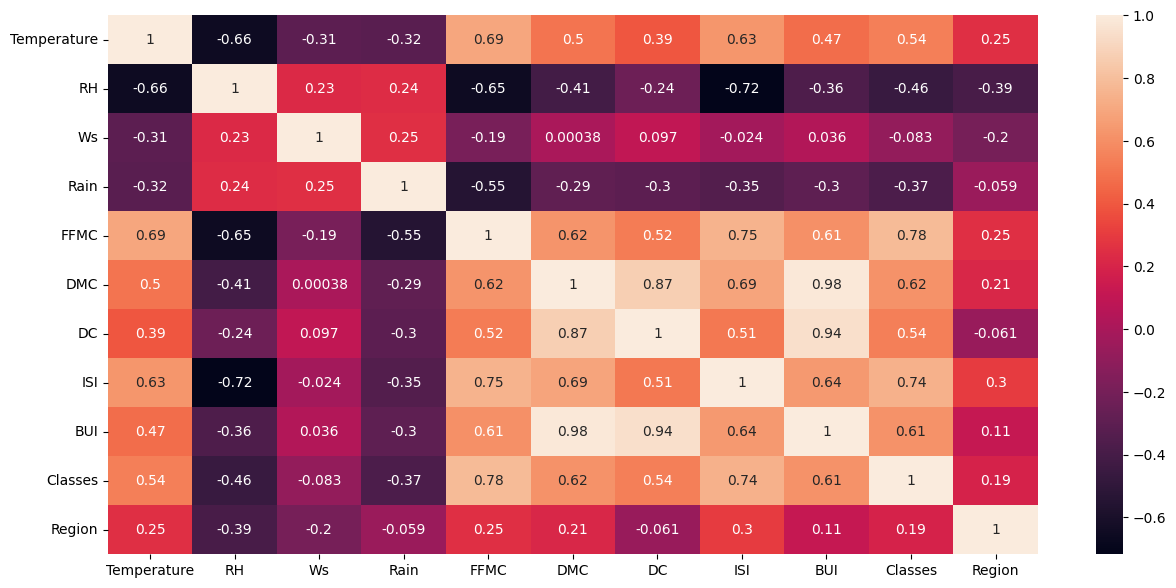

In [179]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(),annot=True)

In [180]:
X_train.corr().shape

(11, 11)

In [181]:
def correlation(dataset,threshold):
    col_corr=set()
    cor_mat=dataset.corr()
    for i in range(cor_mat.shape[1]):
        for j in range(i):
            # print(cor_mat.columns[i],cor_mat.columns[j],cor_mat.iloc[i,j])
            if abs(cor_mat.iloc[i,j])>threshold:
                colname=cor_mat.columns[i]
                col_corr.add(colname)
    return col_corr
        

In [182]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [183]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [184]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature scaling 

In [185]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [186]:
X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [187]:
X_train_trf

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Effect of standardisation using BoxPlot

C:\Users\Arushi Prajapati\AppData\Local\Temp\ipykernel_23428\1422765830.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


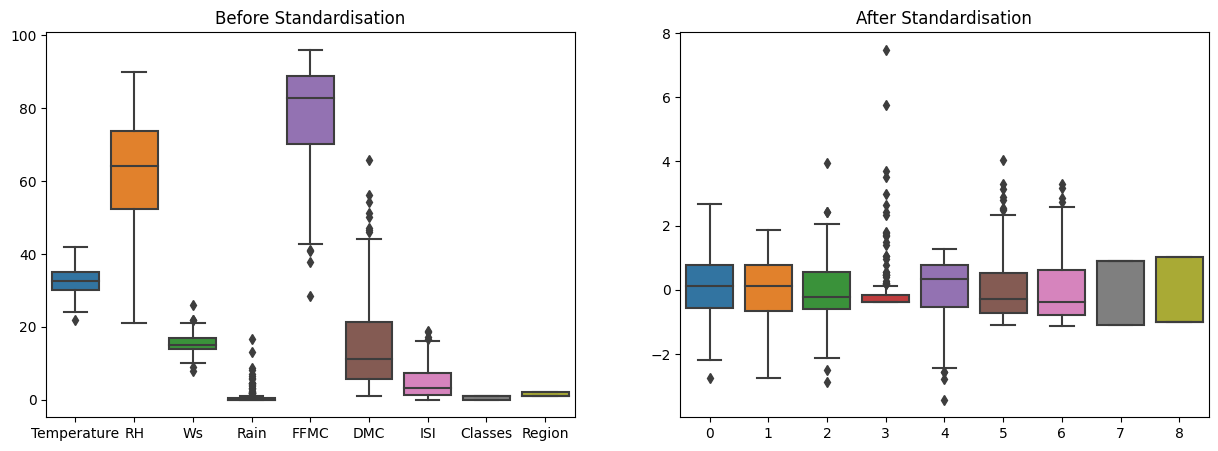

In [188]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before Standardisation")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_trf)
plt.title("After Standardisation")
plt.show()

## Linear Regression Model

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train_trf,y_train)
y_pred=lr.predict(X_test_trf)
print("R2 Score is:", r2_score(y_test,y_pred))


R2 Score is: 0.9847657384266951


## Ridge Regression

In [190]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_trf,y_train)
y_pred=ridge.predict(X_test_trf)
print("R2 Score is:", r2_score(y_test,y_pred))


R2 Score is: 0.9842993364555512


## Lasso Regression

In [191]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_trf,y_train)
y_pred=lasso.predict(X_test_trf)
print("R2 Score is:", r2_score(y_test,y_pred))


R2 Score is: 0.9492020263112388


## ElasticNet

In [192]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
elnet=ElasticNet()
elnet.fit(X_train_trf,y_train)
y_pred=elnet.predict(X_test_trf)
print("R2 Score is:", r2_score(y_test,y_pred))


R2 Score is: 0.8753460589519703


## Pickling

In [193]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [6]:
ridge_model=pickle.load(open('../model/ridge.pkl','rb'))
scaler_model=pickle.load(open('../model/scaler.pkl','rb'))

In [8]:
test_data=[[21.0, 57.0, 18.0, 0.0, 65.67, 3.4, 1.0, 1.0, 1.0]]
test_data_scaled=scaler_model.transform(test_data)
result=ridge_model.predict(test_data_scaled)
result

c:\Users\Arushi Prajapati\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.27351417])